In [3]:
import pandas as pd

df_2016_2021 = pd.read_csv('../data/csv/recalls_2016_2021.csv')

df_2022_2025 = pd.read_csv('../data/csv/recalls_2022_2025.csv')

df_2025_april = pd.read_csv('../data/csv/recalls_2025_april.csv')

In [4]:
#inspect the shape of the dataframes
print(f"Shape of 2016-2021 data: {df_2016_2021.shape}")
print(f"Shape of 2022-2025 data: {df_2022_2025.shape}")
print(f"Shape of 2025 April data: {df_2025_april.shape}")



Shape of 2016-2021 data: (78, 7)
Shape of 2022-2025 data: (74, 8)
Shape of 2025 April data: (17, 8)


In [5]:
print("columns comparison:")

print(f"2016-2021 columns: {df_2016_2021.columns.tolist()}")
print(f"2022-2025 columns: {df_2022_2025.columns.tolist()}")
print(f"2025 April columns: {df_2025_april.columns.tolist()}")

columns comparison:
2016-2021 columns: ['year', 'date', 'product_name', 'inn_name', 'batch_no', 'manufacturer', 'reason']
2022-2025 columns: ['year', 'date', 'recall_ref', 'product_name', 'inn_name', 'batch_no', 'manufacturer', 'reason']
2025 April columns: ['year', 'date', 'recall_ref', 'product_name', 'inn_name', 'batch_no', 'manufacturer', 'reason']


In [6]:
#add missing column to 2016-2021 dataframe

df_2016_2021['recall_ref'] = pd.NA   # Add the new column with None values

In [7]:
columns = ['year', 'date', 'recall_ref', 'product_name', 'inn_name', 'batch_no', 'manufacturer', 'reason']
df_2016_2021 = df_2016_2021[columns]
df_2022_2025 = df_2022_2025[columns]
df_2025_april = df_2025_april[columns]

In [8]:
#concat dataframes
df_all = pd.concat([df_2016_2021, df_2022_2025, df_2025_april], ignore_index=True)

print(f"Shape of combined data: {df_all.shape}")

Shape of combined data: (169, 8)


In [9]:
df_all.to_csv('../data/csv/recalls_combined.csv', index=False)

print("Data combined and saved to 'recalls_combined.csv'")

Data combined and saved to 'recalls_combined.csv'


#   EDA

In [10]:
df_all.info()  # Display information about the combined DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          169 non-null    int64 
 1   date          169 non-null    object
 2   recall_ref    91 non-null     object
 3   product_name  169 non-null    object
 4   inn_name      169 non-null    object
 5   batch_no      169 non-null    object
 6   manufacturer  168 non-null    object
 7   reason        169 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.7+ KB


In [12]:
df_all.describe(include='all')  # Get a summary of the DataFrame, including non-numeric columns

,year,date,recall_ref,product_name,inn_name,batch_no,manufacturer,reason
count,169.00000,169,91,169,169,169,168,169
unique,NaN,123,78,150,123,148,105,128
top,NaN,11/03/2025,REC/2025/009,Atazor-R,Paracetamol,All batches,Biodeal Laboratories Ltd,Color change
freq,NaN,6,2,3,8,7,10,6
mean,2021.56213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.78559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_all.isnull().sum()  

year             0
date             0
recall_ref      78
product_name     0
inn_name         0
batch_no         0
manufacturer     1
reason           0
dtype: int64

In [14]:
df_all["reason"].value_counts()  # Count occurrences of each reason for recall

reason
Color change                                                                                                                                                                                                                                                  6
Out-of-Specification results on uniformity of weight                                                                                                                                                                                                          6
The batch failed dissolution test                                                                                                                                                                                                                             4
Color change of the product to black                                                                                                                                                                                             

In [15]:
df_all['manufacturer'].value_counts()  # Count occurrences of each manufacturer

manufacturer
Biodeal Laboratories Ltd                                                  10
Dawa Ltd                                                                   8
Universal Corporation Ltd                                                  6
Biodeal Laboratories Ltd, Kenya                                            6
Laboratory and Allied Ltd                                                  5
                                                                          ..
Norvatis                                                                   1
Celon laboratories Ltd                                                     1
The metholatum company UK                                                  1
Bellco                                                                     1
National Pharmaceutical Industries Co (SAOG) Muscat, Sultanate of Oman     1
Name: count, Length: 105, dtype: int64

<Figure size 1000x600 with 0 Axes>

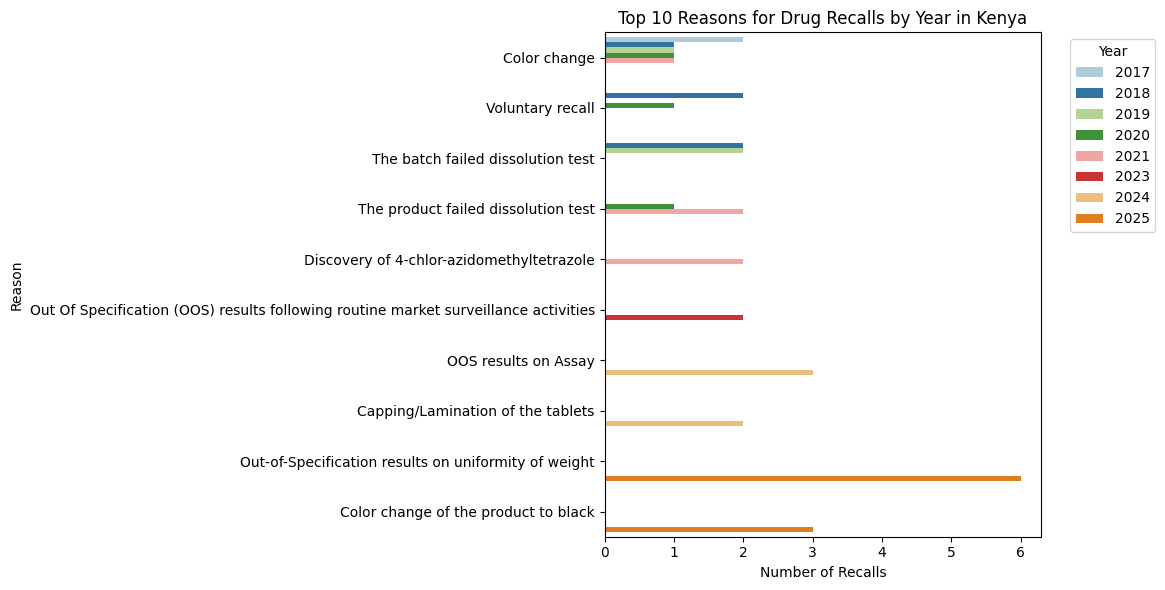

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
top_10 = df_all['reason'].value_counts().nlargest(10).index
filtered = df_all[df_all['reason'].isin(top_10)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, y='reason', hue='year', palette='Paired')

plt.title('Top 10 Reasons for Drug Recalls by Year in Kenya')
plt.xlabel('Number of Recalls')
plt.ylabel('Reason')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



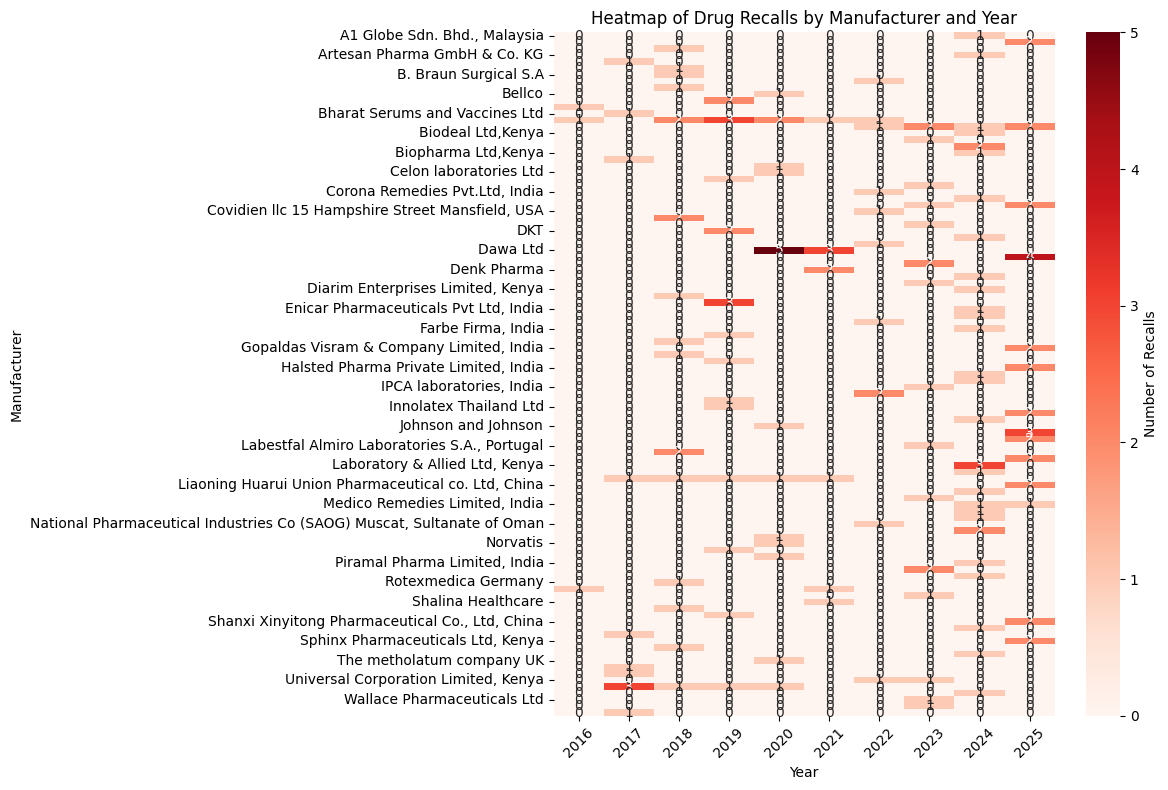

In [29]:
heatmap_data = df_all.groupby(['manufacturer', 'year']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Number of Recalls'})
plt.title('Heatmap of Drug Recalls by Manufacturer and Year')
plt.xlabel('Year')
plt.ylabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-Identify manufacturers with consistently high recall rates
-Thus, communicate risk areas to stakeholders 

# Manufacturer Risk Scores
